In [1]:
from edahelper import *
wsb = pd.read_pickle('../Data/wsb_cleaned.pkl')


In [15]:
wsb.head()

,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
0,Nio day🚀🚀,Evdrmr,2021-01-01 23:55:39,None,https://i.redd.it/ytvyk6p47t861.jpg,0.70,11,0,15,0,False,False,False,kom7tp,1.609545e+09,None,t2_5o7wfxis
1,Stop making “meta” posts about awards. You ain...,None,2021-01-01 23:51:49,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,kom59t,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",NaN
2,Did I do something wrong (r/stocks),nathantheman,2021-01-01 23:49:52,None,https://i.redd.it/if5ewo146t861.jpg,1.00,1,0,0,0,False,False,False,kom3zp,1.609545e+09,None,t2_dwidc
3,Fuck r/stocks all my homies hate r/stocks,Danne080,2021-01-01 23:49:26,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.71,12,0,15,0,True,False,False,kom3oq,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_cyikut2
4,$ACAM 🚀🚀🚀🚀 Go big or go home - I’ll be posting...,None,2021-01-01 23:46:49,[deleted]\n,https://i.redd.it/bigbcmck5t861.jpg,1.00,1,0,0,0,False,False,False,kom1z8,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN


## Score / ups
The number of upvotes

### The preponderance of ignored submissions

One of the first things that is noticeable is that the vast majority of posts have only a handful of upvotes.

See for instance the frequency at which different upvote values occur:

In [8]:
wsb.ups.value_counts().head(20)/len(wsb)

1     0.758082
0     0.043643
2     0.043257
3     0.017425
4     0.009767
5     0.009049
6     0.007795
7     0.006791
8     0.005979
9     0.005154
10    0.004537
11    0.004180
12    0.003658
13    0.003422
14    0.002989
15    0.002773
16    0.002467
17    0.002246
18    0.002111
19    0.001927
Name: ups, dtype: float64

<AxesSubplot:>

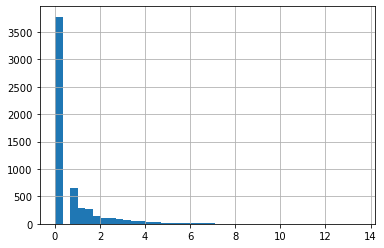

In [30]:
wsb.ups.value_counts().apply( lambda x : np.log(x)).hist(bins = 40)

## Upvote ratio

Because most of the posts linger around 1 vote, and presumably never get seen, for upvote ratios less than one to become common you have to filter out the never seen posts.

Additionally, posts with upvote_ratio < .8 are very rare even after having filtered out the ignored posts.

<AxesSubplot:ylabel='Frequency'>

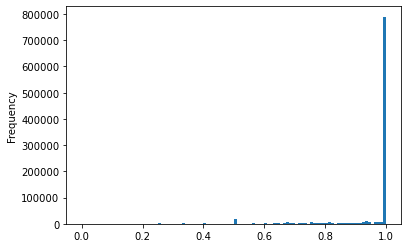

In [11]:
wsb['upvote_ratio'].plot( kind = 'hist', bins = 100)


<AxesSubplot:ylabel='Frequency'>

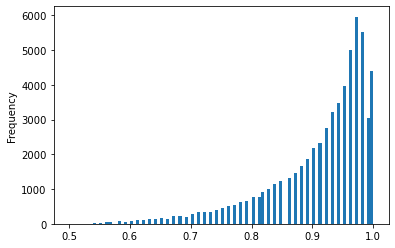

In [13]:
wsb[wsb['ups'] >= 20]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

<AxesSubplot:ylabel='Frequency'>

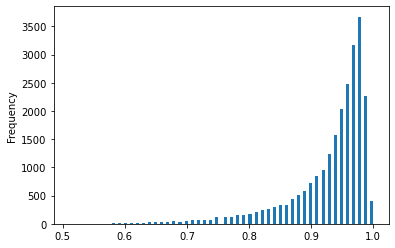

In [12]:
wsb[wsb['ups'] >= 100]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

## Authors

Which authors are the most popular? 
Are there authors that are consistently popular? Or do highly upvoted posts tend to be someones 15 minutes of fame?

In [22]:
total_upvotes = wsb[['author', 'ups']].groupby("author").agg("sum").sort_values(by = 'ups', ascending = False)
total_upvotes.head(10)

,ups
author,
None,8718074
DeepFuckingValue,1551072
OPINION_IS_UNPOPULAR,1258349
keenfeed,1051350
game_stone,743846
dhiral1994,517203
SomeGuyInDeutschland,411137
MIA4real,371842
jordanpeterson9,348100


In [27]:
median_upvotes = wsb[['author', 'ups']].groupby("author").agg(["median", "count"]).sort_values(by = ('ups', 'median'), ascending = False)

In [28]:
median_upvotes.head(20)

ups      
                        median count
author                              
SomeGuyInDeutschland  411137.0     1
mpwrd                 210591.0     1
84935                 209354.0     1
kampingcarl           162833.0     1
CockInAClock          140996.0     1
Bundaga               139455.0     1
liftingtailsofcats    137862.0     1
jeepers_sheepers      126138.0     1
LilHMoney             123084.0     1
yellow_duck12         120417.0     1
Pakistani_in_MURICA   113854.0     1
Lansman               109096.0     1
TaggingSits           106587.0     1
zakaria20199          103555.0     1
garagetechnik         100896.0     1
baha12022001           99747.0     1
Vixul                  99346.0     1
Greenzone51            97507.0     1
Omaha_Beach            95597.0     1
verifypassword__       94540.0     1

I thought SomeGuyInDeutschland had more popular posts than this? (Seems like he did, but before the new year: https://www.reddit.com/user/SomeGuyInDeutschland/posts/ )

In [32]:
author_popularity = wsb[["author", "ups"]].groupby("author").agg(["sum", "count", "mean", 'median'])
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(50)
# A lot of the popular posts are one hit wonders...

ups                               
                          sum count           mean    median
author                                                      
SomeGuyInDeutschland   411137     1  411137.000000  411137.0
mpwrd                  210591     1  210591.000000  210591.0
84935                  209354     1  209354.000000  209354.0
kampingcarl            162833     1  162833.000000  162833.0
CockInAClock           140996     1  140996.000000  140996.0
Bundaga                139455     1  139455.000000  139455.0
liftingtailsofcats     137862     1  137862.000000  137862.0
jeepers_sheepers       126138     1  126138.000000  126138.0
LilHMoney              123084     1  123084.000000  123084.0
yellow_duck12          120417     1  120417.000000  120417.0
Pakistani_in_MURICA    113854     1  113854.000000  113854.0
DeepFuckingValue      1551072    14  110790.857143   87935.0
Lansman                109096     1  109096.000000  109096.0
TaggingSits            106587     1  106587.000000  106587.0
vrweensy               318020     3  106006.666667    3112.0
zakaria20199           103555     1  103555.000000  103555.0
garagetechnik          100896     1  100896.000000  100896.0
baha12022001            99747     1   99747.000000   99747.0
Vixul                   99346     1   99346.000000   99346.0
Greenzone51             97507     1   97507.000000   97507.0
Omaha_Beach             95597     1   95597.000000   95597.0
verifypassword__        94540     1   94540.000000   94540.0
zemora                  93269     1   93269.000000   93269.0
Xonesix                 92952     1   92952.000000   92952.0
Darlink23               92163     1   92163.000000   92163.0
BootySenpai            182060     2   91030.000000   91030.0
chubbygroundhog         90680     1   90680.000000   90680.0
everettglovier          87743     1   87743.000000   87743.0
EastCoastTaffy          87461     1   87461.000000   87461.0
NoReasons1443           86980     1   86980.000000   86980.0
ShortVIXDaily           86478     1   86478.000000   86478.0
Dotton_Creative         86120     1   86120.000000   86120.0
chopper0755             86101     1   86101.000000   86101.0
themagestikarp          85927     1   85927.000000   85927.0
always_plan_in_advan   169978     2   84989.000000   84989.0
Dillownz                81883     1   81883.000000   81883.0
GameDiggest             81617     1   81617.000000   81617.0
Hoboeser                81067     1   81067.000000   81067.0
MixMastaMace            80731     1   80731.000000   80731.0
Effective-Estimate92    77832     1   77832.000000   77832.0
JcAu20                  77070     1   77070.000000   77070.0
adnbenji               154118     2   77059.000000   77059.0
Carvalho355             76974     1   76974.000000   76974.0
DawudM                 153700     2   76850.000000   76850.0
TheElgringo             76662     1   76662.000000   76662.0
gloini                  75902     1   75902.000000   75902.0
ONE_GUY_ONE_JAR         75285     1   75285.000000   75285.0
armchairtycoon          74812     1   74812.000000   74812.0
BMWnoMoney              72665     1   72665.000000   72665.0
idea4granted           144375     2   72187.500000   72187.5

In [33]:
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(200).sort_values(by = ("ups", "count"), ascending = False).head(50)

ups                              
                          sum count           mean   median
author                                                     
keenfeed              1051350    26   40436.538462   6302.0
game_stone             743846    16   46490.375000   1418.0
DeepFuckingValue      1551072    14  110790.857143  87935.0
bawse1                 286204     7   40886.285714  33078.0
zachp004               253434     5   50686.800000  26280.0
punkmaster69           164777     4   41194.250000  48778.5
Fargraven              172713     4   43178.250000  21272.5
shhaayy                212009     4   53002.250000   8476.5
IDoLikeMyShishkebabs   221828     4   55457.000000  22353.0
waaaaaaaaaaaaaaahhhh   148654     4   37163.500000    387.0
N0th1ngMatt3rs5        113641     3   37880.333333      8.0
basava18               137637     3   45879.000000      8.0
fonzy541               111947     3   37315.666667    258.0
SaintHakop             157698     3   52566.000000     28.0
ilikelucy1             167446     3   55815.333333    196.0
freshwater21           129189     3   43063.000000    357.0
GimliSagol             125567     3   41855.666667   7960.0
fuk_normies            108298     3   36099.333333    505.0
Kobeer19               126427     3   42142.333333  57866.0
TheRoaringKitty        128053     3   42684.333333  28545.0
vrweensy               318020     3  106006.666667   3112.0
cyberupdate            129982     3   43327.333333      1.0
Lunar033               187727     3   62575.666667   1890.0
WalyWal                 88764     2   44382.000000  44382.0
devllen05               85532     2   42766.000000  42766.0
adnbenji               154118     2   77059.000000  77059.0
skybike                121698     2   60849.000000  60849.0
Baalk_                 108775     2   54387.500000  54387.5
DawudM                 153700     2   76850.000000  76850.0
BAKAYAROUUUUU          121819     2   60909.500000  60909.5
InFiveMinutes           90297     2   45148.500000  45148.5
Shrubber                85403     2   42701.500000  42701.5
MarioBuzo              110052     2   55026.000000  55026.0
idea4granted           144375     2   72187.500000  72187.5
Wilcoo1                111011     2   55505.500000  55505.5
Networking4Eyes        113062     2   56531.000000  56531.0
Sixstringcal            78822     2   39411.000000  39411.0
furkix                  88810     2   44405.000000  44405.0
GenKaYY                 78945     2   39472.500000  39472.5
mateotrujillowheeler   103442     2   51721.000000  51721.0
therickyy               73054     2   36527.000000  36527.0
BootySenpai            182060     2   91030.000000  91030.0
Geko2012               101230     2   50615.000000  50615.0
HistoryGuardian         71924     2   35962.000000  35962.0
DerivativeIntegral      71819     2   35909.500000  35909.5
l8rnurd                 73331     2   36665.500000  36665.5
vedxddy                 71008     2   35504.000000  35504.0
CHAINSAW_VASECTOMY      71000     2   35500.000000  35500.0
DMmeYourCat             94777     2   47388.500000  47388.5
Darxe                   74856     2   37428.000000  37428.0